In [55]:
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
from scipy.stats import entropy
import scipy.stats
import sklearn.decomposition
import sklearn.manifold
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('../custom.mplstyle')

from lib import *

In [3]:
counters = [count_kmers_proteome(human, k, clean=True) for k in range(1, 10)]

In [11]:
entropies = np.array([entropy(normalize(c), base=2) for i, c in enumerate(counters)])


In [62]:
def coincidence_prob(counter, size=int(1e8)):
    s = np.random.choice(np.asarray(list(counter.keys())), size=size,
                 p=normalize(counter))
    return np.mean(s[:len(s)//2] == s[len(s)//2:])

In [63]:
min_entropies = [-np.log2(coincidence_prob(c)) for c in counters]

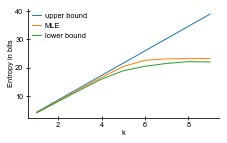

In [64]:
ks = np.arange(1, len(entropies)+1)
plt.plot(ks, np.log2(20)*ks, label='upper bound')
plt.plot(ks, entropies, label='MLE')
plt.plot(ks, min_entropies, label='lower bound')
plt.xlabel('k')
plt.ylabel('Entropy in bits')
plt.legend()

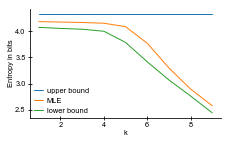

In [68]:
plt.plot(ks, np.ones_like(ks)*np.log2(20), label='upper bound')
plt.plot(ks, entropies/ks, label='MLE')
plt.plot(ks, min_entropies/ks, label='lower bound')
plt.xlabel('k')
plt.ylabel('Entropy in bits')
plt.legend()